In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/bayra/OneDrive/Masaüstü/creditcard.csv")

In [139]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [140]:
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

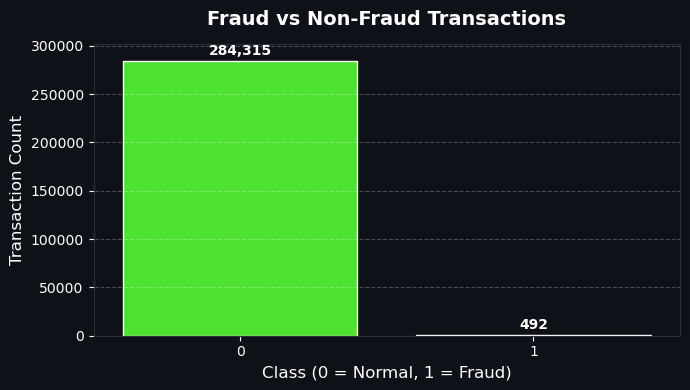

In [141]:
NEON = "#39FF14"
BG    = "#0E1117"

fig, ax = plt.subplots(figsize=(7, 4), facecolor=BG)
ax.set_facecolor(BG)

sns.countplot(data=df, x="Class", color=NEON, edgecolor="white", ax=ax)

ax.set_title("Fraud vs Non-Fraud Transactions", fontsize=14, fontweight="bold", color="white", pad=14)
ax.set_xlabel("Class (0 = Normal, 1 = Fraud)", fontsize=12, color="white")
ax.set_ylabel("Transaction Count", fontsize=12, color="white")

ax.tick_params(colors="white")
for spine in ax.spines.values():
    spine.set_color("#2a2f3a")

ax.grid(axis="y", linestyle="--", alpha=0.25, color="white")

counts = df["Class"].value_counts().sort_index()
ymax   = counts.max()
offset = max(1500, int(0.01 * ymax)) 

for i, v in enumerate(counts):
    ax.text(i, v + offset, f"{v:,}", ha="center", va="bottom",
            fontsize=10, fontweight="bold", color="white")

ax.set_ylim(0, ymax + 6*offset)

plt.tight_layout()
plt.show()

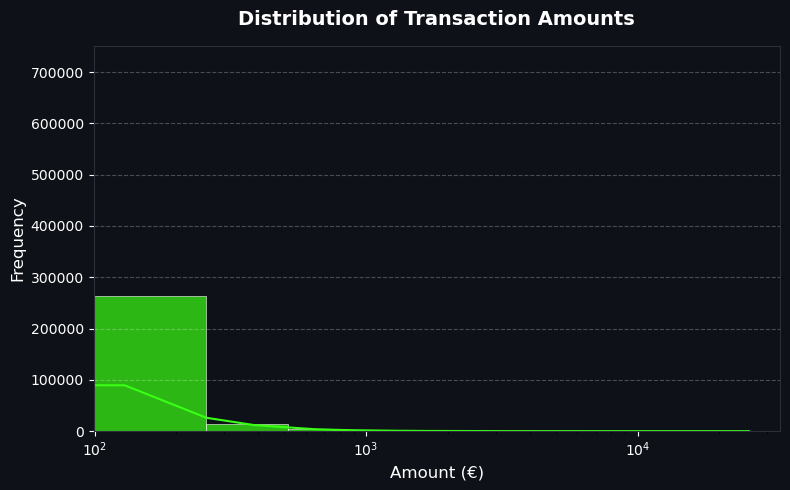

In [142]:
NEON = "#39FF14"
BG    = "#0E1117"

fig, ax = plt.subplots(figsize=(8, 5), facecolor=BG)
ax.set_facecolor(BG)

sns.histplot(
    df['Amount'],
    bins=100,
    kde=True,
    color=NEON,
    edgecolor='white',
    alpha=0.7,
    ax=ax
)
ax.set_title("Distribution of Transaction Amounts", fontsize=14, fontweight="bold", color="white", pad=15)
ax.set_xlabel("Amount (€)", fontsize=12, color="white")
ax.set_ylabel("Frequency", fontsize=12, color="white")

ax.set_xscale('log')

ax.tick_params(colors="white")
for spine in ax.spines.values():
    spine.set_color("#2a2f3a")

ax.grid(axis="y", linestyle="--", alpha=0.25, color="white")

plt.tight_layout()

plt.savefig('transaction_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

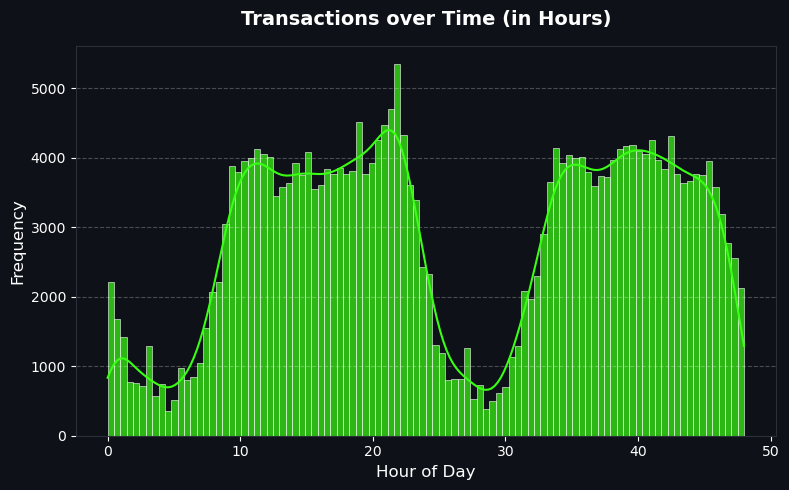

In [143]:
NEON = "#39FF14"
BG    = "#0E1117"

fig, ax = plt.subplots(figsize=(8, 5), facecolor=BG)
ax.set_facecolor(BG)

sns.histplot(
    df['Time'] / 3600,    
    bins=100,
    kde=True,
    color=NEON,
    edgecolor='white',
    alpha=0.7,
    ax=ax
)

ax.set_title("Transactions over Time (in Hours)", fontsize=14, fontweight="bold", color="white", pad=15)
ax.set_xlabel("Hour of Day", fontsize=12, color="white")
ax.set_ylabel("Frequency", fontsize=12, color="white")

ax.tick_params(colors="white")
for spine in ax.spines.values():
    spine.set_color("#2a2f3a")

ax.grid(axis="y", linestyle="--", alpha=0.25, color="white")

plt.tight_layout()

plt.savefig('transactions_over_time.png', dpi=300, bbox_inches='tight')

plt.show()

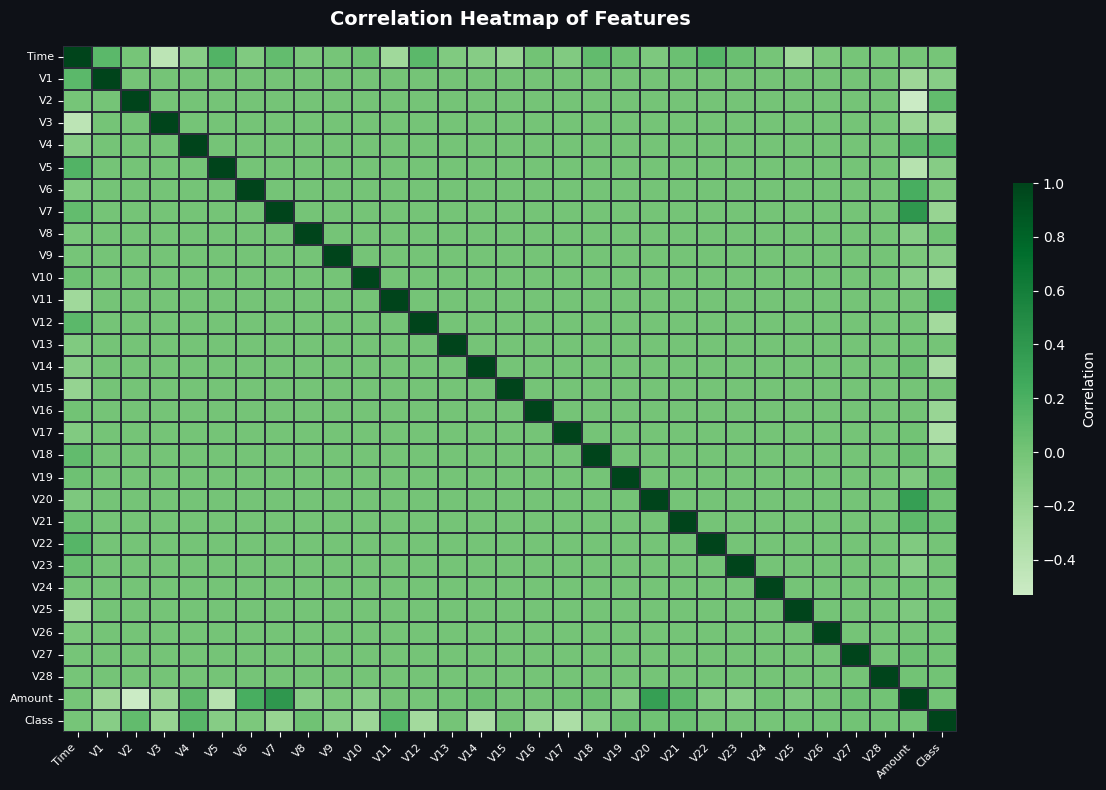

In [144]:
NEON = "#39FF14"
BG    = "#0E1117"

corr = df.corr()

fig, ax = plt.subplots(figsize=(12, 8), facecolor=BG)
ax.set_facecolor(BG)

sns.heatmap(
    corr,
    cmap="Greens",        
    center=0,
    cbar_kws={'shrink': 0.6, 'label': 'Correlation'},
    linewidths=0.2,
    linecolor="#2a2f3a"
)

ax.set_title("Correlation Heatmap of Features", fontsize=14, fontweight="bold", color="white", pad=15)

ax.tick_params(colors="white", labelsize=8)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

ax.figure.axes[-1].yaxis.label.set_color("white") 
ax.figure.axes[-1].tick_params(colors="white")      

plt.tight_layout()

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

plt.show()

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['scaled_amount', 'scaled_time']] = scaler.fit_transform(df[['Amount', 'Time']])

df = df.drop(['Amount', 'Time'], axis=1)
df = df[['scaled_amount', 'scaled_time'] + [col for col in df.columns if col not in ['scaled_amount', 'scaled_time']]]

X = df.drop('Class', axis=1)
y = df['Class']

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape:  {X_test.shape}")
print(f"Fraud ratio (train): {y_train.mean():.6f}")
print(f"Fraud ratio (test):  {y_test.mean():.6f}")

Training data shape: (227845, 30)
Testing data shape:  (56962, 30)
Fraud ratio (train): 0.001729
Fraud ratio (test):  0.001720


In [147]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_res.value_counts())

Before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64

After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)

y_pred = log_reg.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("\nROC-AUC Score:", f"{roc_auc_score(y_test, y_pred):.4f}")

Confusion Matrix:
 [[55406  1458]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962


ROC-AUC Score: 0.9464


In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf_model = RandomForestClassifier(
    n_estimators=200,         
    max_depth=None,         
    random_state=42,
    n_jobs=-1,                
    class_weight='balanced'  
)

rf_model.fit(X_train_res, y_train_res)

y_pred_rf = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=4))
print("\nROC-AUC Score:", f"{roc_auc_score(y_test, y_pred_rf):.4f}")

Confusion Matrix:
 [[56849    15]
 [   18    80]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8421    0.8163    0.8290        98

    accuracy                         0.9994     56962
   macro avg     0.9209    0.9080    0.9144     56962
weighted avg     0.9994    0.9994    0.9994     56962


ROC-AUC Score: 0.9080


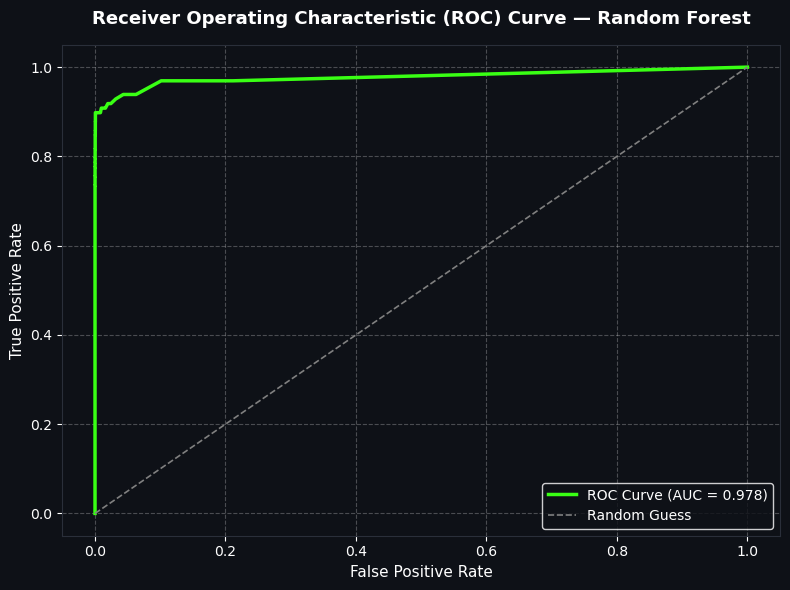

In [152]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

NEON = "#39FF14"
BG    = "#0E1117"

plt.figure(figsize=(8, 6), facecolor=BG)
ax = plt.gca()
ax.set_facecolor(BG)

plt.plot(fpr, tpr, color=NEON, lw=2.5, label=f"ROC Curve (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1.2, label="Random Guess")

plt.title("Receiver Operating Characteristic (ROC) Curve — Random Forest",
          fontsize=13, fontweight="bold", color="white", pad=15)
plt.xlabel("False Positive Rate", fontsize=11, color="white")
plt.ylabel("True Positive Rate", fontsize=11, color="white")

plt.legend(loc="lower right", facecolor=BG, edgecolor="white", labelcolor="white")
plt.grid(True, linestyle="--", alpha=0.25, color="white")

plt.tick_params(colors="white")
for spine in ax.spines.values():
    spine.set_color("#2a2f3a")

plt.tight_layout()

plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')

plt.show()

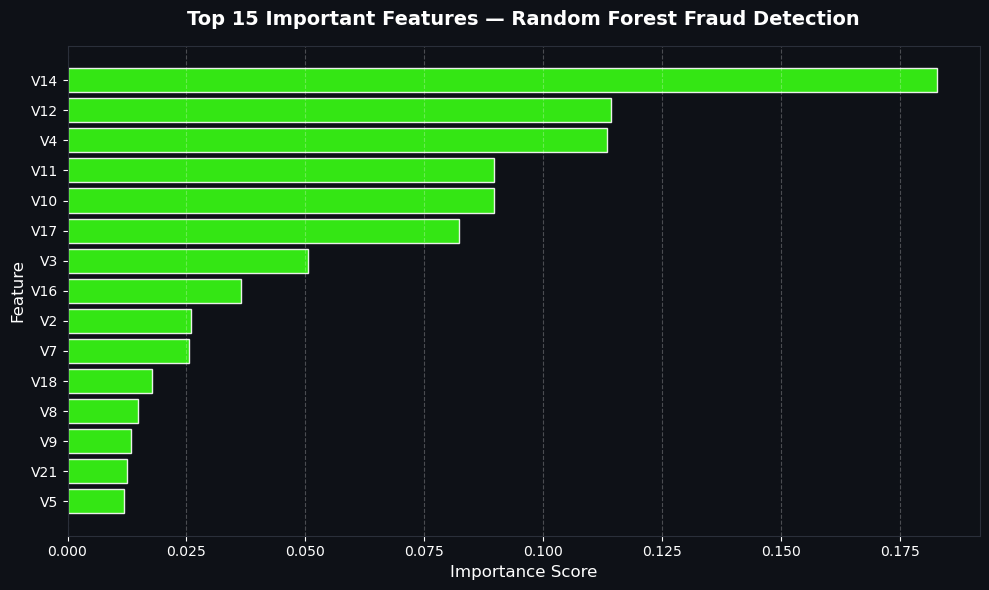

,Feature,Importance
0,V14,0.182674
1,V12,0.114220
2,V4,0.113432
3,V11,0.089699
4,V10,0.089547
5,V17,0.082357
6,V3,0.050558
7,V16,0.036498
8,V2,0.025936
9,V7,0.025463


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X_train_res.columns

feature_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_imp = feature_imp.sort_values(by='Importance', ascending=False).reset_index(drop=True)

NEON = "#39FF14"
BG    = "#0E1117"

fig, ax = plt.subplots(figsize=(10, 6), facecolor=BG)
ax.set_facecolor(BG)

ax.barh(
    feature_imp['Feature'][:15][::-1],
    feature_imp['Importance'][:15][::-1],
    color=NEON,
    edgecolor='white',
    alpha=0.9
)

ax.set_title('Top 15 Important Features — Random Forest Fraud Detection',
             fontsize=14, fontweight='bold', color='white', pad=15)
ax.set_xlabel('Importance Score', fontsize=12, color='white')
ax.set_ylabel('Feature', fontsize=12, color='white')

ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_color('#2a2f3a')
ax.grid(axis='x', linestyle='--', alpha=0.25, color='white')

plt.tight_layout()

plt.savefig('important_features.png', dpi=300, bbox_inches='tight')

plt.show()

feature_imp.head(15)